# A FDFD Solver for Helmholtz Equation in 2D with PML Boundary

Tested on Julia v1.8

Update date: 2023-02-11

This solver is used in a frequency domain full waveform inversion algorithm.
Please check def_structure.jl for more information of defining imaging configuration.

In [1]:
using JLD2, PyPlot
using SparseArrays
using LinearAlgebra

include("def_structure.jl")
include("scalar_helmholtz_solver.jl");

## Model 1: a simple layer model

In [2]:
# define model

Nx = 201
Ny = 201
h = 0.01

vel_true = ones(Nx,Ny)
vel_true[:,1:101] .= 0.8
vel_init = ones(Nx,Ny)

# pml
pml_len = 100
# pml_alpha = 1 is recommended
pml_alpha = 1
Nx_pml = Nx + 2*pml_len
Ny_pml = Ny + 2*pml_len

# time
Nt = 1000
sample_fre = 1000.0
dt = 1/sample_fre
t = range(0, (Nt-1)*dt, Nt)
fre = sample_fre * range(0, 1-1/Nt, Nt)
fre_position = 3:2:5
frequency = fre[fre_position]
fre_num = length(frequency)
println("Frequency is: ", frequency)

# source
source_num = 5
source_coor = zeros(Int, source_num, 2)
for i in 1:source_num
    source_coor[i,1] = 1+(i-1)*50
    source_coor[i,2] = 51
end
source_value = ones(source_num) / dt^2

# receiver
receiver_num = 51
receiver_coor = zeros(Int, receiver_num, 2)
for i in 1:receiver_num
    receiver_coor[i,1] = (i-1)*4+1
    receiver_coor[i,2] = 2
end
println("Receiver number: ", receiver_num)

# define configuration
conf = configuration(Nx,Ny,h,Nt,dt,t,frequency,fre_num,fre_position,source_num,source_coor,source_value,receiver_num,receiver_coor,pml_len,pml_alpha);



Frequency is: 2.0:2.0:4.0
Receiver number: 51


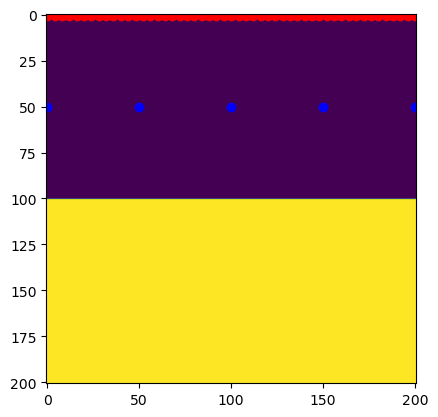

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x0000023D3BDCD000>

In [3]:
imshow(vel_true')
plot(source_coor[:,1].-1, source_coor[:,2].-1, "bo")
plot(receiver_coor[:,1].-1, receiver_coor[:,2].-1, "ro")

In [4]:
W, R = scalar_helmholtz_solver(vel_true, conf; fre_range=[1,2], verbose=true);

Computing helmholtz equation with frequency range: Float32[2.0, 4.0]
Frequency: 2.0 Hz complete.
Frequency: 4.0 Hz complete.


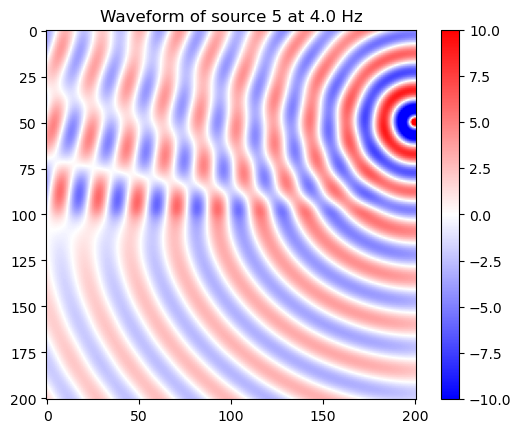

In [5]:
imshow(real(W[:,:,2,5]'), cmap="bwr", clim=[-10,10]); colorbar()
title("Waveform of source 5 at 4.0 Hz");

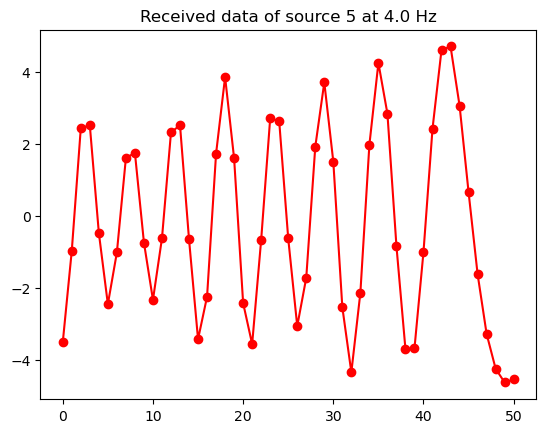

In [6]:
plot(real(R[:,2,5]), "ro-")
title("Received data of source 5 at 4.0 Hz");

## Model 2: Marmousi Model

In [7]:
@load "marmousi.jld2"

vel_true = vel
vel_init = vel

# pml
pml_len = 100
# pml_alpha = 1 is recommended
pml_alpha = 1
Nx_pml = Nx + 2*pml_len
Ny_pml = Ny + 2*pml_len

# time
Nt = 1000
sample_fre = 1000.0
dt = 1/sample_fre
t = range(0, (Nt-1)*dt, Nt)
fre = sample_fre * range(0, 1-1/Nt, Nt)
fre_position = 3:2:7
frequency = fre[fre_position]
fre_num = length(frequency)
println("Frequency is: ", frequency)

# source
source_num = 10
source_coor = zeros(Int, source_num, 2)
for i in 1:source_num
    source_coor[i,1] = 11+(i-1)*50
    source_coor[i,2] = 5
end
source_value = ones(source_num)

# receiver
receiver_num = 48
receiver_coor = zeros(Int, receiver_num, 2)
for i in 1:receiver_num
    receiver_coor[i,1] = (i-1)*10+1
    receiver_coor[i,2] = 1
end
println("Receiver number: ", receiver_num)

# define configuration
conf = configuration(Nx,Ny,h,Nt,dt,t,frequency,fre_num,fre_position,source_num,source_coor,source_value,receiver_num,receiver_coor,pml_len,pml_alpha);



Frequency is: 2.0:2.0:6.0
Receiver number: 48


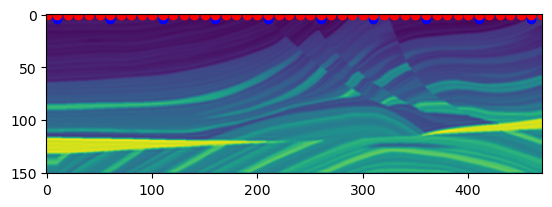

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x0000023D43120520>

In [8]:
imshow(vel_true')
plot(source_coor[:,1].-1, source_coor[:,2].-1, "bo")
plot(receiver_coor[:,1].-1, receiver_coor[:,2].-1, "ro")

In [9]:
W, R = scalar_helmholtz_solver(vel_true, conf; fre_range="all", verbose=true);

Computing helmholtz equation with frequency range: Float32[2.0, 4.0, 6.0]
Frequency: 2.0 Hz complete.
Frequency: 4.0 Hz complete.
Frequency: 6.0 Hz complete.


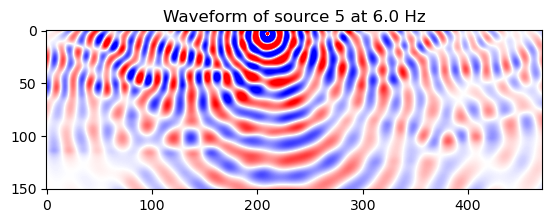

In [10]:
imshow(real(W[:,:,3,5]'), cmap="bwr", clim=[-2e1,2e1])
title("Waveform of source 5 at 6.0 Hz");

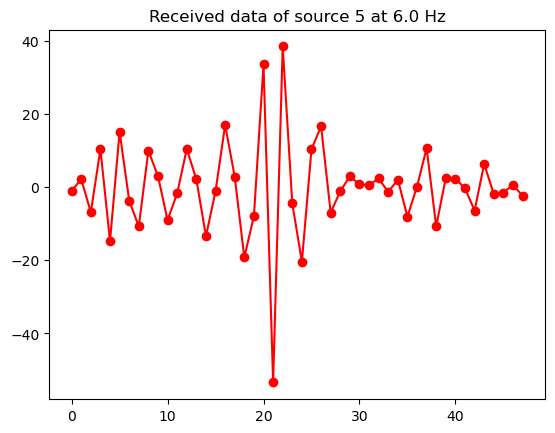

In [11]:
plot(real(R[:,3,5]), "ro-")
title("Received data of source 5 at 6.0 Hz");